In [17]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from datetime import datetime, timedelta
import sys
sys.path.append("/scratch/uni/u237/users/tlang/PhD/flight_segmentation_hackathon/halo-flight-phase-separation/")

from typhon.plots import worldmap
import FlightPhaseTools as fpt
from ResearchFlight import ResearchFlight
from ResearchFlightSegment import ResearchFlightSegment

# Load data into xarray datasets.

In [18]:
bahamas = xr.open_dataset('/scratch/uni/u237/users/tlang/PhD/flight_segmentation_hackathon/data/bahamas_20200130_v0.4.nc')
dropsondes = xr.open_dataset('/scratch/uni/u237/users/tlang/PhD/flight_segmentation_hackathon/data/dropsondes_20200130_v0.4.nc')

# Determine the timestamps of the different flight phases using the FlightPhaseTools module.

In [19]:
takeoff = 0
touchdown = len(bahamas['time']) - 1

enter_leg1 = fpt.find_first_value_after_ts_ind(bahamas, quantity='heading', timestamp_ind=takeoff, 
                                  apr_value=347., margin=0.2)
min_roll_after_leg1 = fpt.min_timestamp_ind(bahamas, 'heading', 
                                  slice(bahamas['time'][enter_leg1], '2020-01-30T11:55:00'),
                                  order=1000)
exit_leg1 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=min_roll_after_leg1, 
                                  apr_value=0., margin=0.2) + 2
min_heading_b4_leg2 = fpt.min_timestamp_ind(bahamas, 'heading', 
                                            slice(bahamas['time'][exit_leg1], '2020-01-30T11:55:00'),
                                            order=1000)
enter_leg2 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=min_heading_b4_leg2, 
                                               apr_value=0., margin=0.2)
min_roll_after_leg2 = fpt.min_timestamp_ind(bahamas, 'roll', 
                                  slice('2020-01-30T12:07:00', '2020-01-30T12:10:00'),
                                  order=1000)
exit_leg2 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=min_roll_after_leg2, 
                                  apr_value=0., margin=0.2) + 1
max_heading_b4_leg3 = fpt.max_timestamp_ind(bahamas, 'heading', 
                                   slice(bahamas['time'][exit_leg2], '2020-01-30T12:10:00'),
                                   order=1000)
enter_leg3 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=max_heading_b4_leg3, 
                                               apr_value=0., margin=0.3)
min_roll_after_leg3 = fpt.min_timestamp_ind(bahamas, 'roll', 
                                  slice(bahamas['time'][enter_leg3], '2020-01-30T12:20:00'),
                                  order=1000)
exit_leg3 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=min_roll_after_leg3, 
                                  apr_value=0., margin=0.2) + 2
min_heading_b4_leg4 = fpt.min_timestamp_ind(bahamas, 'heading', 
                                            slice(bahamas['time'][exit_leg3], '2020-01-30T12:25:00'),
                                            order=1000)
enter_leg4 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=min_heading_b4_leg4, 
                                               apr_value=0., margin=1.0)
max_roll_after_leg4 = fpt.max_timestamp_ind(bahamas, 'roll', 
                                  slice(bahamas['time'][enter_leg4], '2020-01-30T12:35:00'),
                                  order=1000)
exit_leg4 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=max_roll_after_leg4, 
                                               apr_value=0., margin=0.2)
min_heading_after_leg4 = fpt.min_timestamp_ind(bahamas, 'heading', 
                                               slice(bahamas['time'][exit_leg4], '2020-01-30T12:45:00'),
                                               order=1000)
enter_leg5 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=min_heading_after_leg4, 
                                               apr_value=0., margin=0.2)
min_roll_after_leg5 = fpt.min_timestamp_ind(bahamas, 'roll', 
                                  slice(bahamas['time'][enter_leg5], '2020-01-30T13:00:00'),
                                  order=1000)
exit_leg5 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=min_roll_after_leg5, 
                                               apr_value=0., margin=0.2)
enter_leg6 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=min_roll_after_leg5, 
                                               apr_value=0., margin=0.2) - 7
max_roll_after_leg6 = fpt.max_timestamp_ind(bahamas, 'roll', 
                                            slice(bahamas['time'][exit_leg5], '2020-01-30T13:15:00'),
                                            order=1000)
exit_leg6 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=max_roll_after_leg6, 
                                               apr_value=0., margin=0.2) + 5
enter_leg7 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=max_roll_after_leg6, 
                                               apr_value=0., margin=0.2) - 3
max_roll_after_leg7 = fpt.max_timestamp_ind(bahamas, 'roll', 
                                            slice(bahamas['time'][enter_leg7], '2020-01-30T13:40:00'),
                                            order=1000)
exit_leg7 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=max_roll_after_leg7, 
                                               apr_value=0., margin=0.2) + 4
enter_leg8 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=max_roll_after_leg7, 
                                               apr_value=0., margin=0.2)
max_roll_after_leg8 = fpt.max_timestamp_ind(bahamas, 'roll', 
                                            slice(bahamas['time'][enter_leg8], '2020-01-30T14:00:00'),
                                            order=2000)
exit_leg8 = fpt.find_first_value_before_ts_ind(bahamas, quantity='roll', timestamp_ind=max_roll_after_leg8, 
                                               apr_value=0., margin=0.2)
enter_leg9 = fpt.find_first_value_after_ts_ind(bahamas, quantity='roll', timestamp_ind=max_roll_after_leg8, 
                                               apr_value=0., margin=0.2)
bahamas["altitude_dt"] = (['time'], np.append(np.diff(bahamas["altitude"]),0))
min_dalt_dt_after_leg9 = fpt.min_timestamp_ind(bahamas, 'altitude_dt', 
                                               slice(bahamas['time'][enter_leg9], '2020-01-30T15:00:00'),
                                               order=3000)
exit_leg9 = fpt.find_first_value_before_ts_ind(bahamas, quantity='altitude_dt', 
                                               timestamp_ind=min_dalt_dt_after_leg9, 
                                               apr_value=0., margin=0.2)
ts_ind_list = [enter_leg1, exit_leg1, enter_leg2, 
               exit_leg2, enter_leg3, exit_leg3, 
               enter_leg4, exit_leg4, enter_leg5, 
               exit_leg5, enter_leg6, exit_leg6, 
               enter_leg7, exit_leg7, enter_leg8, 
               exit_leg8, enter_leg9, exit_leg9]
label_list = ["enter_leg1_RT", "exit_leg1_RT", "enter_leg2_RT", 
              "exit_leg2_RT", "enter_leg3_RT", "exit_leg3_RT", 
              "enter_leg4_RT", "exit_leg4_RT", "enter_leg5", 
              "exit_leg5", "enter_leg6_sat", "exit_leg6_sat", 
              "enter_leg7", "exit_leg7", "enter_leg8_dust", 
              "exit_leg8_dust", "enter_leg9", "exit_leg9"]


# Plot basic timeseries of bahamas data with markers for determined timestamps to manually evaluate the validity of the timestamps.

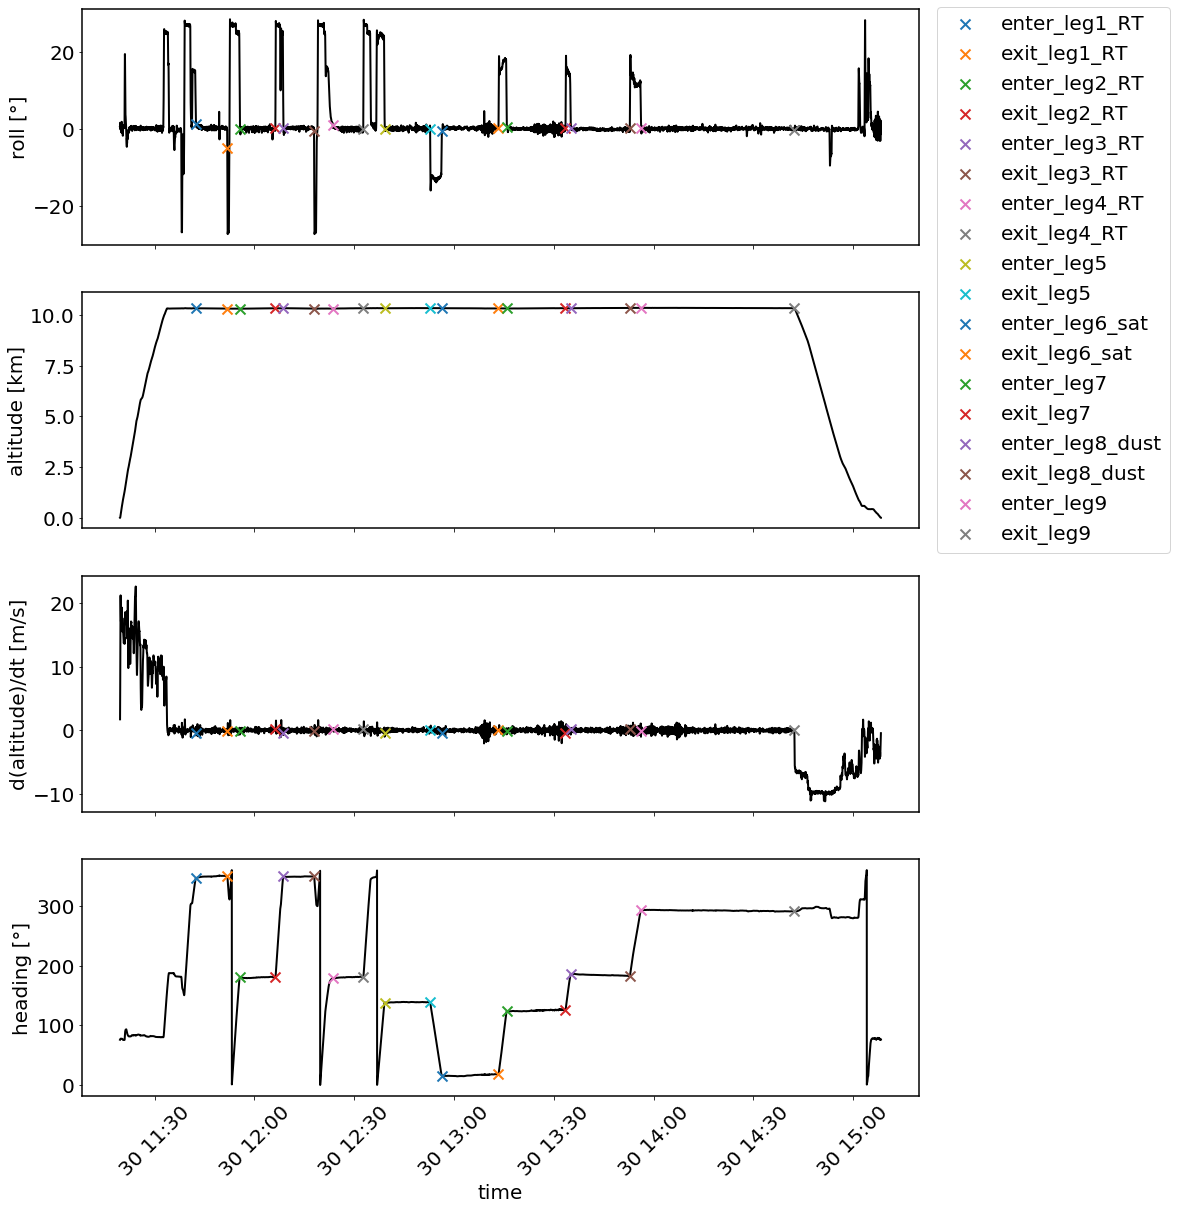

In [20]:
%matplotlib inline
fig, ax = fpt.plot_bahamas_timeseries(bahamas, ts_ind_list, label_list)

# Create a ResearchFlight object to represent the flight meta data.

In [21]:
RF06 = ResearchFlight(name=f"RF{bahamas.attrs['flight_number']}",
                      mission=bahamas.attrs['mission'],
                      flight_id='HALO-0130',
                      contacts=[
                          {
                              'name': 'Marc Prange', 
                              'email': 'marc.prange@uni-hamburg.de',
                              'tags': ['lc', 'dc'],
                          },
                          {

                              'name': 'Mario Mech',
                              'email': 'mario.mech@uni-koeln.de',
                              'tags': ['pi']
                          },
                          {

                              'name': 'Theresa Lang',
                              'email': 'theresa.lang@uni-hamburg.de',
                              'tags': ['dc']
                          }
                      ],
                      date=fpt.dt64_to_dt(bahamas['time'][takeoff].values).date(),
                      flight_report='https://observations.ipsl.fr/aeris/eurec4a-data/REPORTS/HALO/2020/20200130/HALO-0130.pdf',
                      takeoff=fpt.dt64_to_dt(bahamas['time'][takeoff].values),
                      landing=fpt.dt64_to_dt(bahamas['time'][touchdown].values),
                      events=[],
                      remarks=['Short flight duration of about 3 hours and 48 minutes.',
                               'Joint race track pattern with ATR.',
                               'GPM satellite underpass.',
                               'Straight leg above saharan dust layer.'],
)

# Store the flight phase information in ResearchFlightSegment objects.

In [22]:
leg1 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 1 racetrack',
                             segment_id=f'{RF06.flight_id}_sl1',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg1].values),
                             end=fpt.dt64_to_dt(bahamas["time"][exit_leg1].values),
                             irregularities=[]
                            )
leg2 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 2 racetrack',
                             segment_id=f'{RF06.flight_id}_sl2',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg2].values),
                             end=fpt.dt64_to_dt(bahamas["time"][exit_leg2].values),
                             irregularities=[]
                            )
leg3 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 3 racetrack',
                             segment_id=f'{RF06.flight_id}_sl3',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg3].values),
                             end=fpt.dt64_to_dt(bahamas["time"][exit_leg3].values),
                             irregularities=[]
                            )
leg4 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 4 racetrack',
                             segment_id=f'{RF06.flight_id}_sl4',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg4].values),
                             end=fpt.dt64_to_dt(bahamas["time"][exit_leg4].values),
                             irregularities=[]
                            )
leg5 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 5 towards GPM',
                             segment_id=f'{RF06.flight_id}_sl5',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg5].values),
                             end=fpt.dt64_to_dt(bahamas["time"][exit_leg5].values),
                             irregularities=[]
                            )
leg6 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 6 GPM underpass',
                             segment_id=f'{RF06.flight_id}_sl6',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg6].values),
                             end=fpt.dt64_to_dt(bahamas["time"][exit_leg6].values),
                             irregularities=[]
                            )
leg7 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 7 towards dust',
                             segment_id=f'{RF06.flight_id}_sl7',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg7].values),
                             end=fpt.dt64_to_dt(bahamas["time"][exit_leg7].values),
                             irregularities=[]
                            )
leg8 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 8 dust overpass',
                             segment_id=f'{RF06.flight_id}_sl8',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg8].values),
                             end=fpt.dt64_to_dt(bahamas["time"][exit_leg8].values),
                             irregularities=[]
                            )
leg9 = ResearchFlightSegment(kinds=['straight_leg'],
                             name='Leg 9 towards Barbados',
                             segment_id=f'{RF06.flight_id}_sl9',
                             start=fpt.dt64_to_dt(bahamas["time"][enter_leg9].values),
                             end=fpt.dt64_to_dt(bahamas["time"][exit_leg9].values),
                             irregularities=[]
                            )

In [23]:
RF06.append_segments([leg1, leg2, leg3, leg4, leg5, leg6, leg7, leg8, leg9])

In [24]:
RF06.to_yaml(filename='../flight_phase_files/HALO_RF06_20200130_info.yaml')